<img src="https://www.tu-darmstadt.de/media/resources/images_1/tu_logo_web.svg" width="200">

_________

# 1.3- Model Interpretation of Uranium Maps

* **Date :** 06 March 2023
* **Author :** Augustine M Gbondo ==> Hydrogeologist, Environmental Engineer.

* **Problem Statement :** 
Different interpolation methods in GIS yield varuable results. It is always necessary 
to ensure the right interpolation model is used for your mapping. In this notebook, 4 interpolation techniques were statistically analysed to discover 
This notebook analyses the correlation and subsequent error of three different maps
created from Irregularily spaced sampling campaign. For this project, `pandas` `numpy`, `geopandas`,`shapely`, `seaborn`,`matplotlib` were all utilised to achieve this objective

In [2]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import contextily as ctx
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
#Importing shapefiles
Ur = gpd.read_file('Uranium/Uranium_raw.shp')
df = gpd.read_file('Uranium/Uranium.shp')
Hessen = gpd.read_file("Radon Hessen/AOI_Hessen.shp")

df.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
df.shape #(1184, 7)
df.head(2)
df.describe()

,U_PPM,Idw_Uran,Kriging_Ur,Kriging__1,Kriging__2
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,2.802010,2.756184,2.770930,2.589702,2.589690
std,3.117623,2.725435,3.031113,1.947923,1.947915
min,0.017647,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.197985,1.295940,1.270888,1.271197
50%,1.891745,1.968300,2.262975,2.264300,2.264020
75%,3.436404,3.284310,3.090310,2.910230,2.910297
max,38.000000,37.467400,47.430300,10.907200,10.909000


In [5]:
#Renaming columns
df.columns = ['U (ppm)','U conc. (ppm)',
              'Idw_Uran','Kriging_Ur','Kriging__1','Kriging__2','geometry']
df.head(2)

,U (ppm),U conc. (ppm),Idw_Uran,Kriging_Ur,Kriging__1,Kriging__2,geometry
0,0.658554,<5,0.683458,1.35617,1.43312,1.43324,POINT (479393.315 5548319.759)
1,0.100000,<5,1.179410,1.75981,2.31977,2.31606,POINT (502381.627 5614338.351)


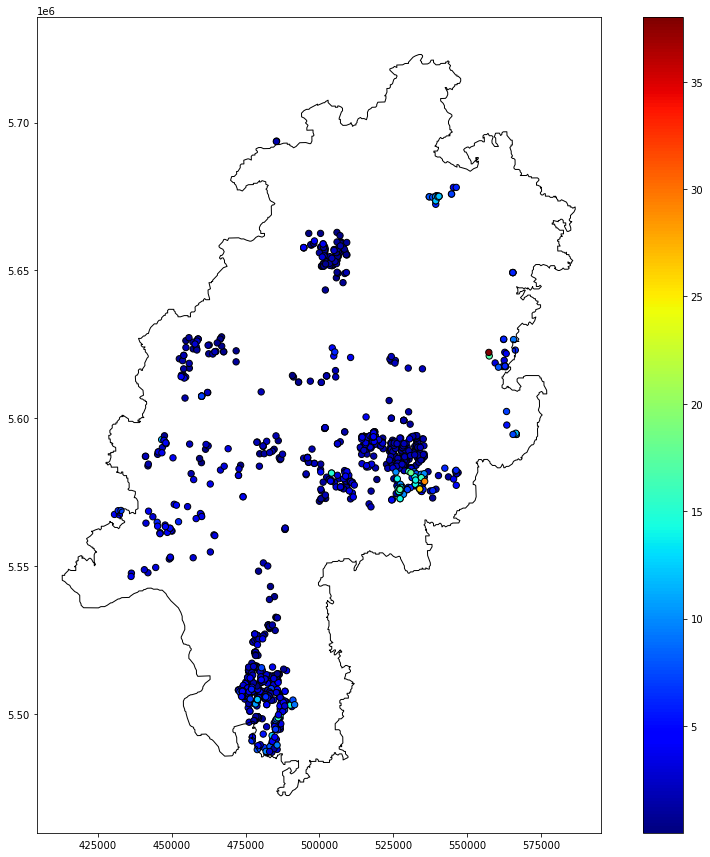

In [6]:
#Plotting Uranium point data
fig, ax=plt.subplots(figsize = (15,15))
ax2 = df.plot(ax = ax,
              column = 'U (ppm)',
              cmap = 'jet',
              edgecolor='black',markersize = 40,
              legend = True)
ax1 = Hessen.plot(ax = ax, column = 'NAME_1',
                  facecolor="none", edgecolor="black")
plt.show()
fig.savefig('Uranium point data.png', dpi='figure')

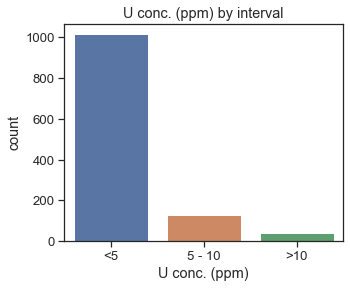

In [9]:
#Setting theme for plots
#COUNTplot for UR
sns.set_theme(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))
sns.countplot(x=df['U conc. (ppm)'])

plt.ylabel ('count')
plt.xlabel ('U conc. (ppm)')
plt.title('U conc. (ppm) by interval')
plt.savefig('U conc. (ppm) by interval.png', dpi='figure')

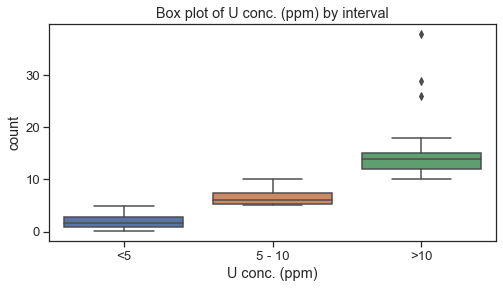

In [18]:
#BOXplot of Ur
sns.set_theme(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='U conc. (ppm)',
            y='U (ppm)' ,dodge=False)

plt.ylabel ('count')
plt.xlabel ('U conc. (ppm)')
plt.title('Box plot of U conc. (ppm) by interval')
plt.savefig('BOXplot of U conc. (ppm) by interval.png', dpi='figure')

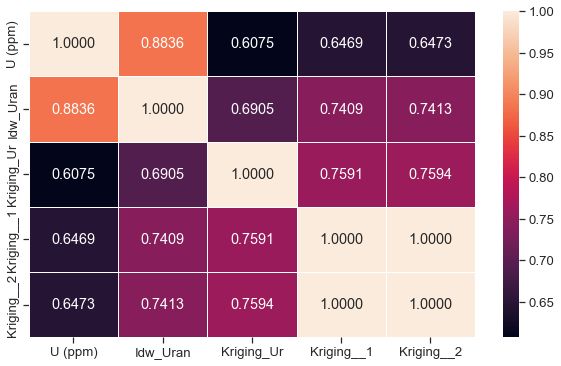

<Figure size 432x288 with 0 Axes>

In [19]:
Uranium_correlation = df.corr()
## plotting correllation heatmap
plt.figure (figsize = (10,6))
sns.heatmap(data = Uranium_correlation,
            annot = True, cbar=True,
            linewidth=.5, fmt=".4f")
plt.show()
plt.savefig('Uranium heatmap.png', dpi='figure', )


**Comments;**
* `Idw_Uran` was the most accurate method amongst all four methods 

**------> Geostatistical Analysis**